# Day 2 - Mean Sea Surface

This is the notebook for day 2 in the bathymetry course. It will mainly exist of plotting and inspecting different reference surfaces, and looking at the differences between them. There will be some small lines where we ask you to change some parameters or perform some small calculations.

In [253]:
# As we did yesterday, we import some of the libraries we will use to help our code
import numpy as np
import matplotlib.pylab as plt

In [254]:
# As we will make similar figures many times in this notebook
# we will here define a new "function" that we can use multiple times.

def show_map(X, unit="m"):
    # Define area of interest (AOI)
    AOI = [90, 120, -10, 15] # Malaysia

    # Additionally we will import a topography map - to help us understand
    # where we are looking
    land = np.load("land.npy")

    plt.figure(figsize=(15,8))
    prc = np.nanpercentile(X, [2, 98])
    sc=plt.imshow(X, extent=AOI, origin="lower", cmap="turbo", vmin=prc[0], vmax=prc[1], interpolation=None)
    plt.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
    plt.colorbar(sc, label="({})".format(unit))
    plt.xlabel("Longitude (deg East)")
    plt.ylabel("Latitude (deg North)")
    plt.show()

## Inspect Reference Surfaces
We have three different reference surfaces provided here:
1. The Mean Sea Surface (MSS)
2. The Lowest Astronomical Tide (LAT)
3. The Geoid

They are all different, but are all very similar. Try to run the next tiles to see how much they look alike

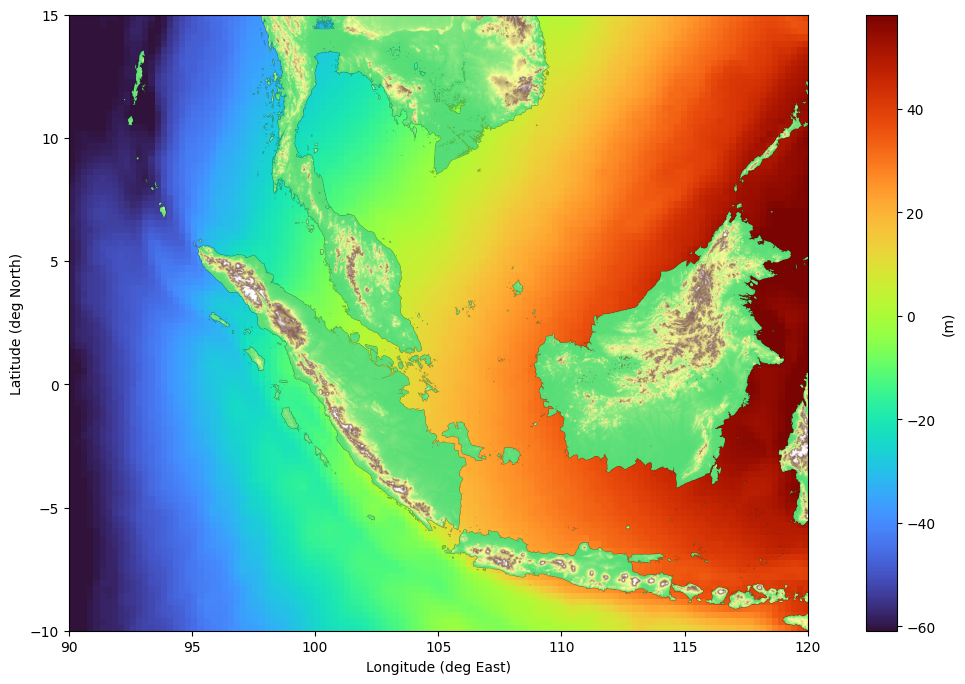

In [255]:
# We inspect the mean sea surface around Malaysia
mss = np.load("mss_malay.npy")
show_map(mss)

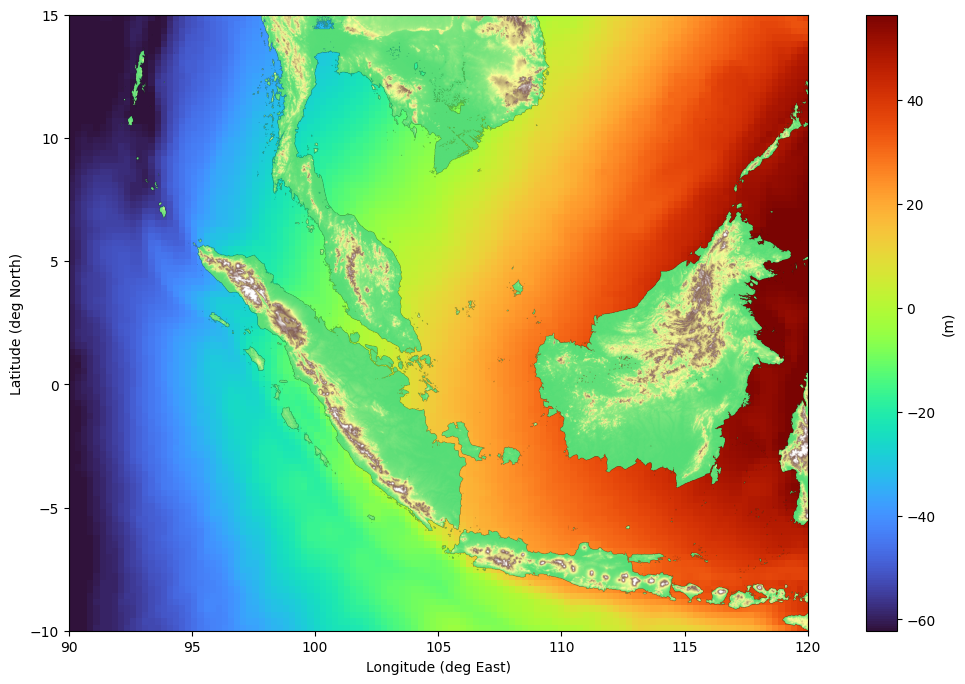

In [256]:
# We inspect the lowest atronomical tide around Malaysia
lat = np.load("lat_malay.npy")
show_map(lat)

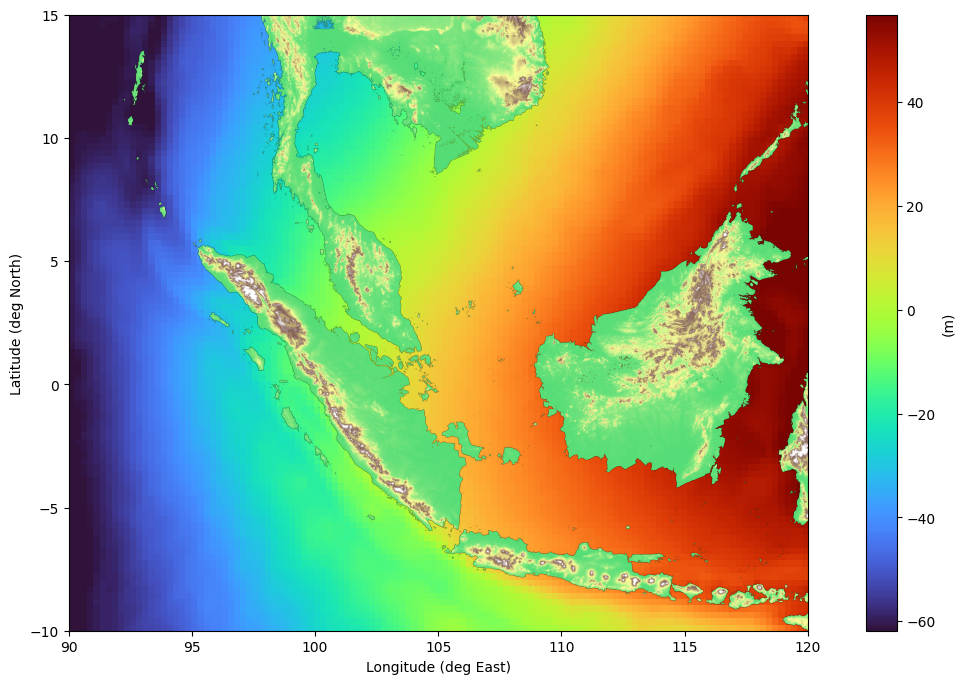

In [257]:
# We inspect the geoid around Malaysia
geoid = np.load("geoid_malay.npy")
show_map(geoid)

## Inspect differences between reference surfaces
In order to really see what the difference between the reference surfaces are, we need to subtract them from each other and see the difference. See if you can explain what the difference is between each of them

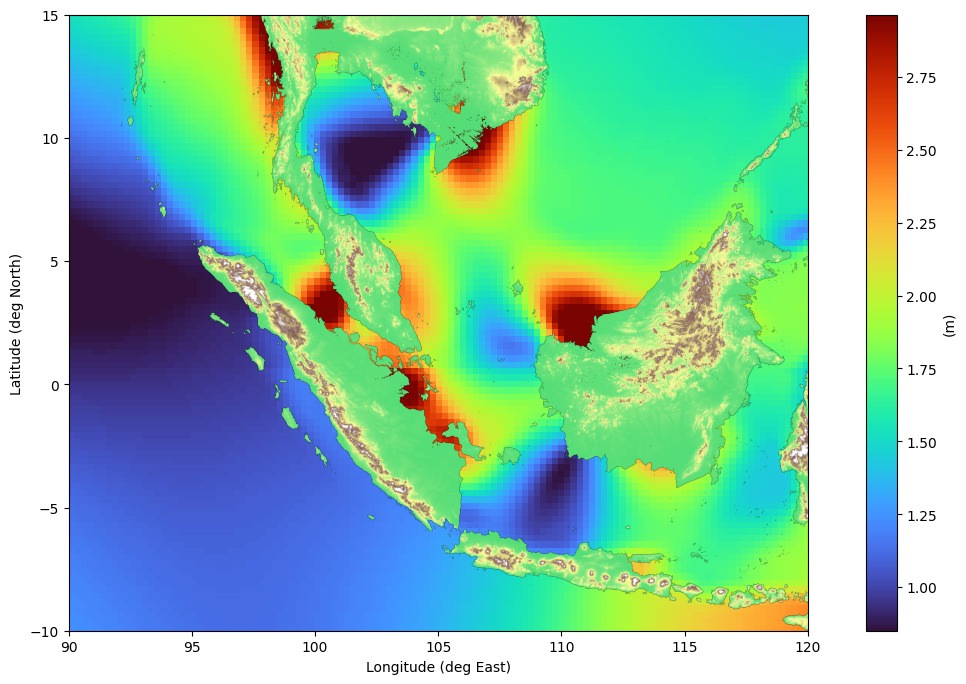

In [258]:
# Difference between MSS and LAT
difference = mss-lat
show_map(difference)

In [ ]:
# You have to add something to this code-tile yourself to make it run

# How do we compute the mean dynamic topography?
# The equation is: mdt = mss - geoid
mdt = 
show_map(mdt)

## Sea level rise
Sea level is not static, but changes every year. But the rate of change is location dependent. Here we will take a look at how it changes around Malaysia.

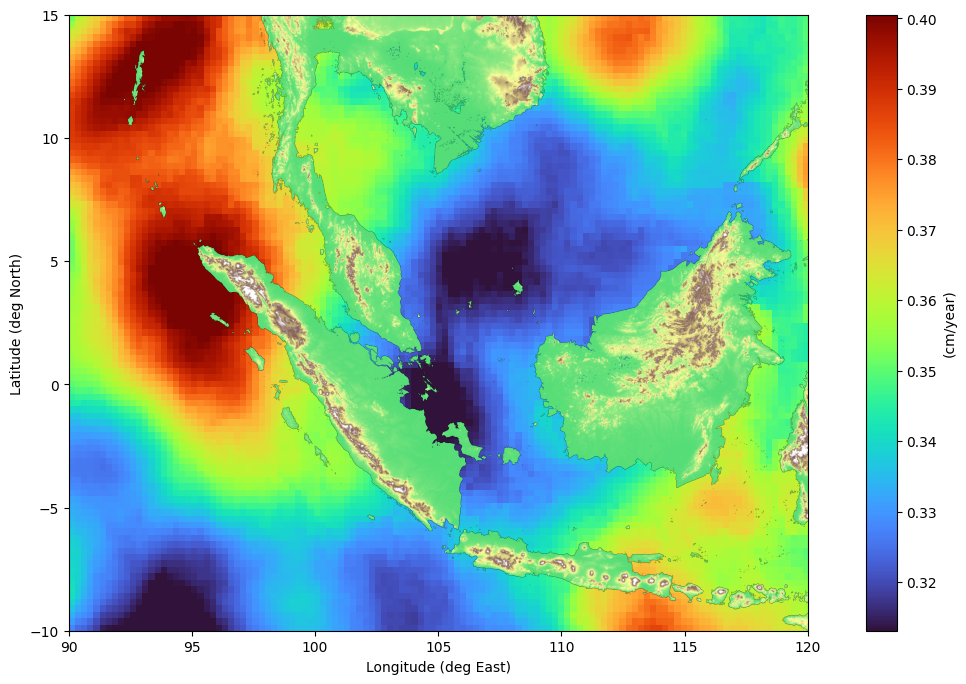

In [259]:
# We have computed the rate of change in cm per year around Malaysia.
# Load the data
rate_of_change = np.load("trend_malay.npy")
# We change the unit of the map to show cm/year
unit = "cm/year"
# Plot the rate of change
show_map(rate_of_change, unit)
# Far away from land the rate of change is around 0.5 cm/year

# Sea level rise in the future

In [260]:
# As we have the rate of change in cm/year, we can predict the future sea level

# Show the future sea level in 5 years time, 15 years time and 30 years time by
# multiplying the rate of change by the number of years
unit = "cm"
sea_level_rise = 
show_map(sea_level_rise, unit)

SyntaxError: invalid syntax (152891035.py, line 6)

In [ ]:
# When you have calculated the future sea level rise, we can
# determine what the future sea level is gonna be by adding
# the increase in water level, to the current mean sea surface
future_sea_level = mss + sea_level_rise
show_map(future_sea_level)

# Satellite observations around Malaysia
The reference surfaces are created from satellite observations. We have extracted some of them here, in order to see how the observations look like around Malaysia.

In [ ]:
# We load the datafile
data = np.load("satellite_malay.npy")

# Extract the values from the columns like we did yesterday
latitude = data[:,1]
longitude = data[:,2]
ssh = data[:,4]
geoid_satellite = data[:,6]
mss_satellite = data[:,7]
lat_satellite = data[:,8]

In [ ]:
# We make a new function that is slightly modified,
# in order to show the satellite tracks

def show_tracks(lon, lat, X, unit="m"):
    # Define area of interest (AOI)
    AOI = [90, 120, -10, 15] # Malaysia

    # Additionally we will import a topography map - to help us understand
    # where we are looking
    land = np.load("land.npy")

    plt.figure(figsize=(15,8))
    prc = np.nanpercentile(X, [2, 98])
    sc = plt.scatter(lon, lat, 1, X, cmap="turbo")
    plt.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
    plt.colorbar(sc, label="({})".format(unit))
    plt.xlabel("Longitude (deg East)")
    plt.ylabel("Latitude (deg North)")
    plt.show()

## Inspect the data contained in the satellite observations

In [ ]:
# Show the sea surface height observations from the satellite
value = ssh
show_tracks(longitude, latitude, value)

In [ ]:
# Show the mss observations at the satellite tracks
# input this yourself
value = 
show_tracks(longitude, latitude, value)

## Look at the differences at the satellite tracks

In [ ]:
# Show the mss observations at the satellite tracks
difference = ssh-geoid_satellite
show_tracks(longitude, latitude, difference)

In [ ]:
# Show the difference between the SSH and the latoid
difference = 
show_tracks(longitude, latitude, difference)

## Look at the individual orbits
The data we have seen before stems from multiple years of observations. To get an idea of how a single pass of the satellite looks, we can sort in our data, and only plot data from a single orbit. Try to change the orbit number to get an orbit that passes between Sarawak and the Peninsula

In [ ]:
# Run this code to show a single orbit

# Extract orbit identification number
satellite_orbit_id = data[:,0]
satellite_orbit_id_list = np.unique(data[:,0])

extract_track_number = 0 # <----- change this number in order to change the orbit that is plotted
                         # Can be anything between 0 and 26

# Create a data mask that only keeps the data with the correct orbit ID number
mask = (satellite_orbit_id == satellite_orbit_id_list[extract_track_number])

# Plot the tracks
show_tracks(longitude[mask], latitude[mask], ssh[mask])

# Make your own mean sea surface (optional)
If we have the time, we can experiment with some interpolation techniques, in order to create a mean sea surface from the sparse satellite observations we had above. We will see how we can get a MSS but we will also see what some of the problems are.

In [ ]:
# We make this small function that takes the satellite data, and makes it into a grid
# however, there are some problems with this method, that we will discover in this notebook

from scipy.interpolate import griddata
def grid_data(val, method="cubic"):
    grid_lon, grid_lat = np.meshgrid(np.arange(90, 120+0.25, 0.25), np.arange(-10, 15-0.25*4, 0.25))
    gridded = griddata(np.c_[longitude, latitude], val, (grid_lon, grid_lat), method=method)
    return gridded


In [ ]:
# Make a mean sea surface from the satellite data.
our_own_mss = grid_data(ssh)
show_map(our_own_mss)

In [ ]:
# See what the difference between the mss we computed using all available satellites, and
# the one you just made using only 1 satellite
mss = np.load("mss_malay.npy")

# see what the difference is: mss - our_own_mss
difference = 
show_map(difference)

In [ ]:
# Here we plot the difference with the satellite track overlaid ontop in black
# Can you see where the largest problems are?

# Define area of interest (AOI)
AOI = [90, 120, -10, 15] # Malaysia

# Additionally we will import a topography map - to help us understand
# where we are looking
land = np.load("land.npy")

plt.figure(figsize=(15,8))
prc = np.nanpercentile(difference, [2, 98])
sc=plt.imshow(difference, extent=AOI, origin="lower", cmap="turbo", vmin=prc[0], vmax=prc[1], interpolation=None)
plt.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.scatter(longitude, latitude, 5, "k", alpha=0.1)
plt.colorbar(sc, label="({})".format(unit))
plt.xlabel("Longitude (deg East)")
plt.ylabel("Latitude (deg North)")
plt.show()